# Read in a nifti file and crop it to a region of interest

In [22]:
import os
import os.path
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import nibabel as nib

In [2]:
base_filename = "../data/output/S264294/S264294_DTI_gated_20150508093306_12"

In [3]:
fdwi = base_filename + ".nii.gz"
fbval = base_filename + ".bval"
fbvec = base_filename + ".bvec"

In [4]:
img = nib.load(fdwi)
data = img.get_data()

In [5]:
data.shape

(116, 116, 72, 65)

In [6]:
print(img.header.get_zooms()[:3])

(1.9827586, 1.9827586, 2.0)


In [7]:
from dipy.io import read_bvals_bvecs
bvals, bvecs = read_bvals_bvecs(fbval, fbvec)

In [8]:
from dipy.core.gradients import gradient_table
gtab = gradient_table(bvals, bvecs)

In [9]:
gtab.info

B-values shape (65,)
         min 0.000000 
         max 1000.000000 
B-vectors shape (65, 3)
         min -0.964118 
         max 0.999988 


In [10]:
print(gtab.bvals)

[   0. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000.]


In [11]:
print(gtab.bvecs[:10, :])

[[ 0.          0.          0.        ]
 [ 0.999975   -0.00504502 -0.00503994]
 [ 0.          0.999988   -0.00497989]
 [-0.0249489   0.65464    -0.755529  ]
 [ 0.589353   -0.769866   -0.244886  ]
 [-0.235876   -0.529835   -0.81464   ]
 [-0.893575   -0.264756   -0.36253   ]
 [ 0.797989    0.133987   -0.58759   ]
 [ 0.232856    0.932211   -0.277056  ]
 [ 0.936737    0.145261   -0.31847   ]]


In [12]:
S0s = data[:, :, :, gtab.b0s_mask]
S0s.shape

(116, 116, 72, 1)

In [13]:
data.dtype

dtype('<i2')

In [14]:
S0s[:,:,50, 0].max()

1398

In [15]:
import matplotlib.patches as patches

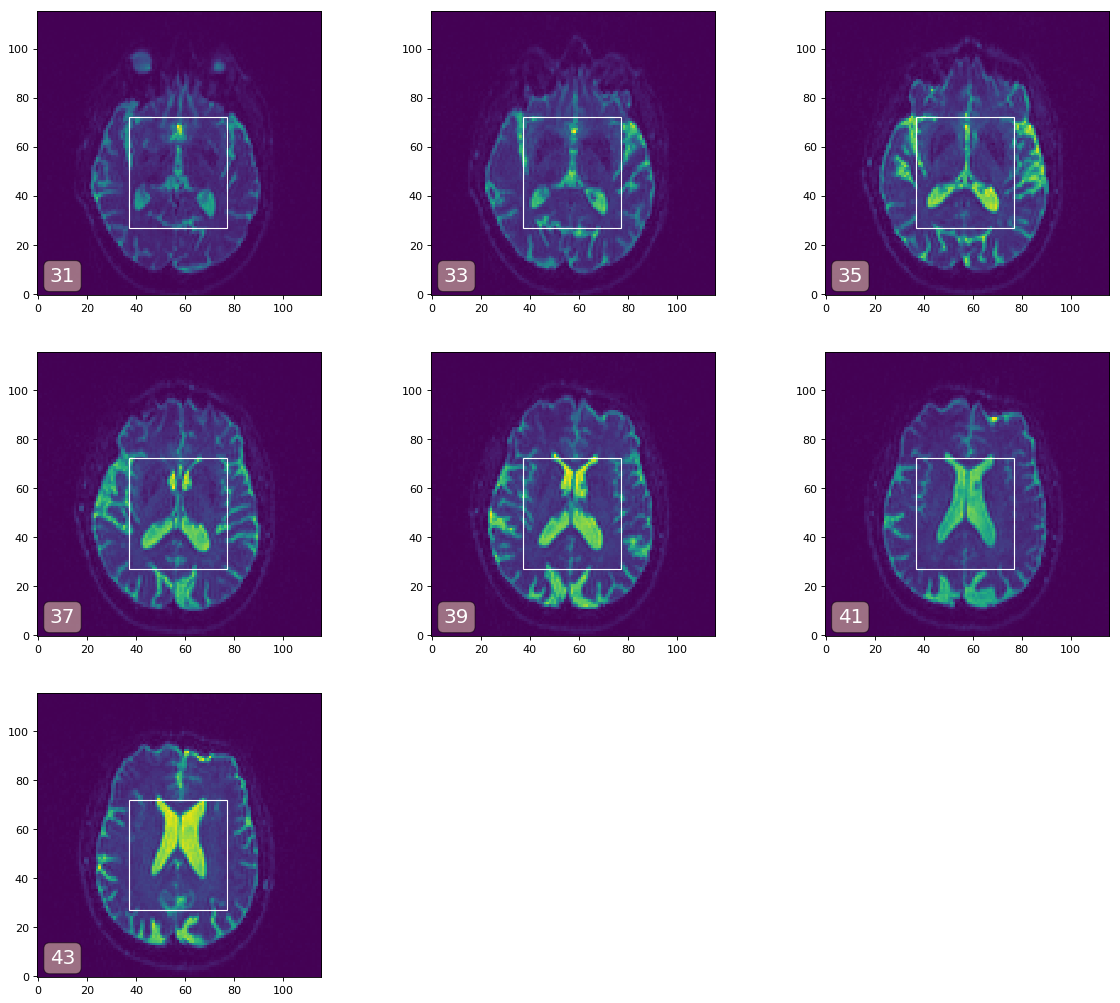

In [21]:
# Plot the b0 image for a few z-indices
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
for i, idx in enumerate(range(31, 45, 2)):
    plt.subplot(3, 3, i+1)
    plt.text(10, 5, str(idx), fontsize=18, ha="center", color="white",
            bbox = dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    plt.imshow(data[:,:, idx, 0].transpose(), origin="lower")
    rect = patches.Rectangle((37, 27), 40 , 45, linewidth=1, edgecolor='white', facecolor='none' )
    plt.gca().add_patch(rect)
    

In [17]:
data.shape

(116, 116, 72, 65)

In [18]:
# Now crop the data to the rectangles above
import dipy.segment.mask
data_crop = dipy.segment.mask.crop(data, mins=(37-1, 27-1, 31,0), maxs=(37-1+40, 27-1+45,43,65))
data_crop.shape

(40, 45, 12, 65)

In [19]:
crop_file = base_filename + "crop.nii.gz"
nib.save(nib.Nifti1Image(data_crop, img.affine), crop_file)